In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle



In [ ]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
from google.colab import files

# Upload your Kaggle API JSON file (replace 'kaggle.json' with your file's name)
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"acmasaibi","key":"7caff668113f6a01169192a3d003e3e3"}'}

In [ ]:
!kaggle datasets download -d phylake1337/fire-dataset


 97% 374M/387M [00:02<00:00, 136MB/s]
100% 387M/387M [00:02<00:00, 140MB/s]


In [ ]:
!unzip fire-dataset.zip


Archive:  fire-dataset.zip
  inflating: fire_dataset/fire_images/fire.1.png  
  inflating: fire_dataset/fire_images/fire.10.png  
  inflating: fire_dataset/fire_images/fire.100.png  
  inflating: fire_dataset/fire_images/fire.101.png  
  inflating: fire_dataset/fire_images/fire.102.png  
  inflating: fire_dataset/fire_images/fire.103.png  
  inflating: fire_dataset/fire_images/fire.104.png  
  inflating: fire_dataset/fire_images/fire.105.png  
  inflating: fire_dataset/fire_images/fire.106.png  
  inflating: fire_dataset/fire_images/fire.107.png  
  inflating: fire_dataset/fire_images/fire.108.png  
  inflating: fire_dataset/fire_images/fire.109.png  
  inflating: fire_dataset/fire_images/fire.11.png  
  inflating: fire_dataset/fire_images/fire.110.png  
  inflating: fire_dataset/fire_images/fire.111.png  
  inflating: fire_dataset/fire_images/fire.112.png  
  inflating: fire_dataset/fire_images/fire.113.png  
  inflating: fire_dataset/fire_images/fire.114.png  
  inflating: fire_datas

In [ ]:
!pip install scikit-learn


In [1]:
pip install opencv-python


In [ ]:
#training svm after trensfaring the jpg data into csv

In [ ]:
import os
import cv2
import numpy as np
from skimage.feature import hog
from skimage import exposure

# Set the paths to your image folders
fire_folder = "/content/fire_dataset/fire_images/"
non_fire_folder = "/content/fire_dataset/non_fire_images/"

# Initialize lists to store features and labels
features = []
labels = []

# Function to extract HOG and Color Histogram features from an image
def extract_features(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate HOG features
    fd, hog_image = hog(gray_image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), block_norm="L2-Hys", visualize=True)

    # Normalize the HOG feature vector
    fd = exposure.rescale_intensity(fd, in_range=(0, 10))

    # Calculate color histogram features
    hist, _ = np.histogram(image, bins=8, range=(0, 256))

    # Flatten the histogram into a 1D array
    color_hist_features = hist.flatten()

    # Combine HOG and color histogram features
    combined_features = np.hstack((fd, color_hist_features))

    return combined_features

# Iterate through the "fire" folder and extract features and labels
for filename in os.listdir(fire_folder):
    if filename.endswith(".jpg"):
        image_path = os.path.join(fire_folder, filename)

        # Determine the label (1 for fire, 0 for non-fire)
        label = 1

        # Extract features from the image
        feature_vector = extract_features(image_path)

        # Append features and labels to lists
        features.append(feature_vector)
        labels.append(label)

# Iterate through the "non-fire" folder and extract features and labels
for filename in os.listdir(non_fire_folder):
    if filename.endswith(".jpg"):
        image_path = os.path.join(non_fire_folder, filename)

        # Determine the label (1 for fire, 0 for non-fire)
        label = 0

        # Extract features from the image
        feature_vector = extract_features(image_path)

        # Append features and labels to lists
        features.append(feature_vector)
        labels.append(label)

# Convert lists to NumPy arrays
X = np.array(features)
y = np.array(labels)

# Now, X contains the feature vectors and y contains the corresponding labels
# You can save these arrays or use them for training machine learning models like SVM


In [ ]:
import os

# Define the paths to your image folders
fire_folder = "/content/fire_dataset/fire_images/"
non_fire_folder = "/content/fire_dataset/non_fire_images/"

# Create an empty list to store image paths and labels
image_paths = []
labels = []

# Iterate through the "fire" folder and add image paths and labels
for filename in os.listdir(fire_folder):
    if filename.endswith(".jpg"):
        image_path = os.path.join(fire_folder, filename)
        image_paths.append(image_path)
        labels.append(1)  # 1 indicates fire

# Iterate through the "non-fire" folder and add image paths and labels
for filename in os.listdir(non_fire_folder):
    if filename.endswith(".jpg"):
        image_path = os.path.join(non_fire_folder, filename)
        image_paths.append(image_path)
        labels.append(0)  # 0 indicates non-fire

# Now, image_paths contains a list of image file paths, and labels contains their corresponding labels
# You can save these lists or use them for further processing


In [ ]:
import cv2
import numpy as np
import os
import pandas as pd

# Define a function to extract color histogram features
def extract_color_histogram(image_path):
    try:
        image = cv2.imread(image_path)
        if image is None:
            raise Exception("Error loading image: {}".format(image_path))

        hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
        hist = cv2.normalize(hist, hist).flatten()
        return hist
    except Exception as e:
        print("Error processing image:", str(e))
        return None

# Specify the directory where your dataset is located
dataset_dir = "/content/fire_dataset"

# Initialize lists to store features and labels
features = []
labels = []

# Loop through the fire and non-fire image folders
for class_name in ["fire_images", "non_fire_images"]:
    class_dir = os.path.join(dataset_dir, class_name)
    class_label = 1 if class_name == "fire_images" else 0

    for image_file in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_file)

        # Extract color histogram features
        hist_features = extract_color_histogram(image_path)

        if hist_features is not None:
            # Append features and labels
            features.append(hist_features)
            labels.append(class_label)

# Create a DataFrame to store features and labels
data = pd.DataFrame(features)
data["Label"] = labels

# Save the data to a CSV file
csv_filename = "/content/fire_dataset/output_dataset.csv"
data.to_csv(csv_filename, index=False)


Error processing image: Error loading image: /content/fire_dataset/non_fire_images/non_fire.189.png


In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from skimage.io import imread
from skimage.transform import resize


In [ ]:
# List all column names
print(dataset_dir .columns)


AttributeError: ignored

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your CSV dataset
dataset = pd.read_csv('/content/fire_dataset/output_dataset.csv')

# Extract features (all columns except the 'Label' column) and labels
X = dataset.drop('Label', axis=1).values
y = dataset['Label'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier (you can choose the kernel and other hyperparameters)
clf = SVC(kernel='linear', C=1.0, random_state=42)

# Train the SVM classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Generate classification report and confusion matrix
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Save the trained SVM model if needed
# You can use joblib or pickle for model persistence

# Print classification report and confusion matrix
print('Classification Report:')
print(report)
print('\nConfusion Matrix:')
print(confusion)


Accuracy: 91.00%
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.76      0.82        54
           1       0.92      0.97      0.94       146

    accuracy                           0.91       200
   macro avg       0.90      0.86      0.88       200
weighted avg       0.91      0.91      0.91       200


Confusion Matrix:
[[ 41  13]
 [  5 141]]


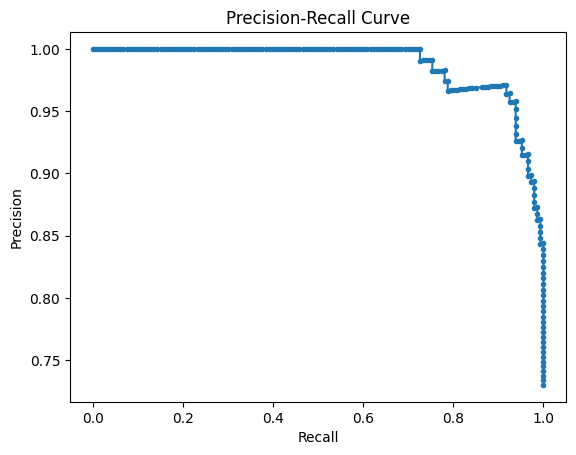

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, clf.decision_function(X_test))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


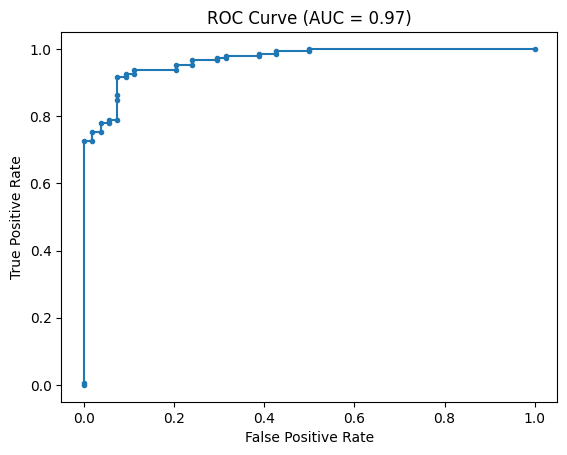

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_test, clf.decision_function(X_test))
auc = roc_auc_score(y_test, clf.decision_function(X_test))
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve (AUC = {auc:.2f})')
plt.show()


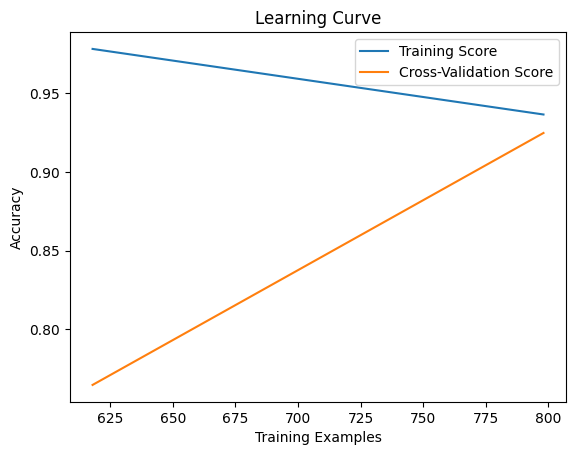

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(clf, X, y, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training Score')
plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Score')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()



**now cnn**
Import Necessary Libraries


In [ ]:
# Import Data Science Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from PIL import Image

# Tensorflow Libraries
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping,ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import Model
from tensorflow.keras.layers.experimental import preprocessing

# System libraries
from pathlib import Path
import os.path
# Metrics
from sklearn.metrics import classification_report, confusion_matrix
import itertools

**🤙Create helper functions**

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Import series of helper functions for our notebook
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir, pred_and_plot

--2023-10-10 22:11:42--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-10-10 22:11:42 (84.7 MB/s) - ‘helper_functions.py’ saved [10246/10246]



**📥Load and Transform Data**

In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = (320, 320)

In [ ]:
# Walk through each directory
dataset = "/content/fire_dataset"
walk_through_dir(dataset)

There are 2 directories and 1 images in '/content/fire_dataset'.
There are 0 directories and 755 images in '/content/fire_dataset/fire_images'.
There are 0 directories and 244 images in '/content/fire_dataset/non_fire_images'.


📅Placing data into a Dataframe:
The first column filepaths contains the file path location of each individual images. The second column labels, on the other hand, contains the class label of the corresponding image from the file path

In [ ]:
image_dir = Path(dataset)

# Get filepaths and labels
filepaths = list(image_dir.glob(r'**/*.JPG')) + list(image_dir.glob(r'**/*.jpg')) + list(image_dir.glob(r'**/*.png'))

labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

In [ ]:
len(list(image_dir.glob(r'**/*.png')))

999

In [ ]:
image_df

Filepath            Label
0        /content/fire_dataset/fire_images/fire.34.png      fire_images
1       /content/fire_dataset/fire_images/fire.447.png      fire_images
2       /content/fire_dataset/fire_images/fire.353.png      fire_images
3       /content/fire_dataset/fire_images/fire.716.png      fire_images
4       /content/fire_dataset/fire_images/fire.660.png      fire_images
..                                                 ...              ...
994  /content/fire_dataset/non_fire_images/non_fire...  non_fire_images
995  /content/fire_dataset/non_fire_images/non_fire...  non_fire_images
996  /content/fire_dataset/non_fire_images/non_fire...  non_fire_images
997  /content/fire_dataset/non_fire_images/non_fire...  non_fire_images
998  /content/fire_dataset/non_fire_images/non_fire...  non_fire_images

[999 rows x 2 columns]

Visualizing images from the dataset

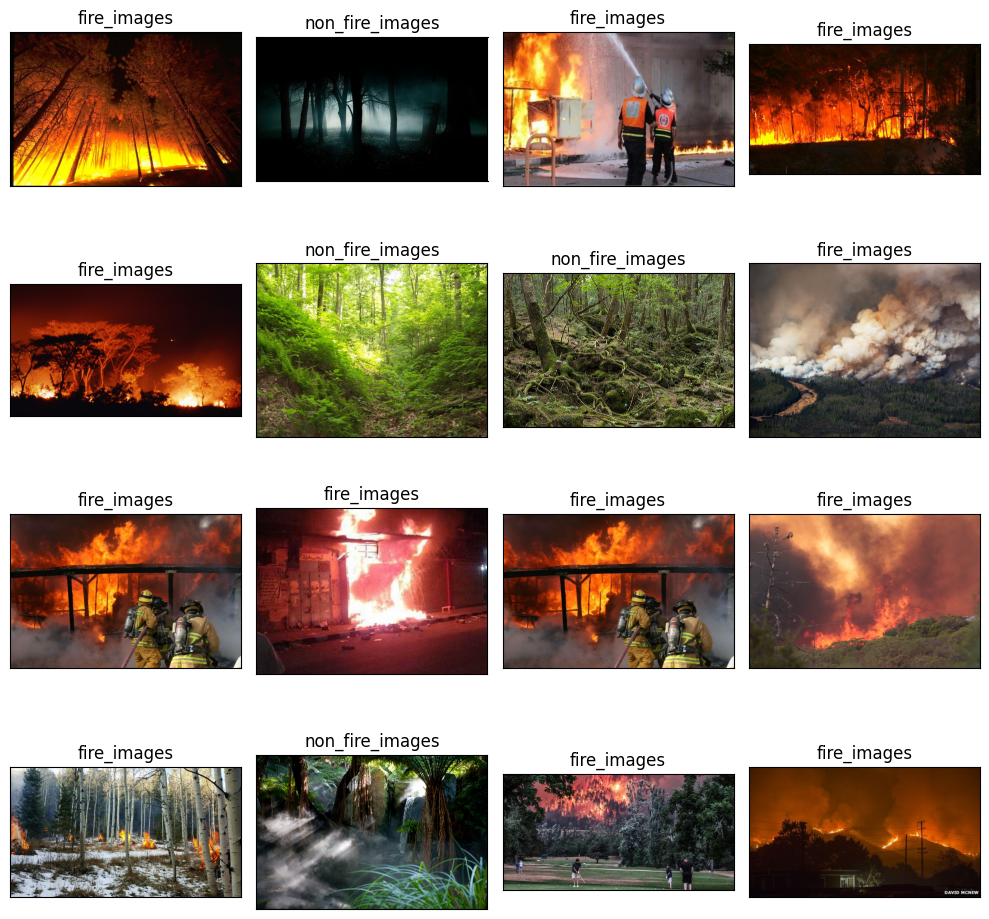

In [ ]:
import matplotlib.image as mpimg
# Display 16 picture of the dataset with their labels
random_index = np.random.randint(0, len(image_df), 16)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    image = Image.open(image_df.Filepath[random_index[i]])
    ax.imshow(image)
    ax.set_title(image_df.Label[random_index[i]])
plt.tight_layout()
plt.show()

📝Data Preprocessing
The data will be split into three different categories: Training, Validation and Testing. The training data will be used to train the deep learning CNN model and its parameters will be fine tuned with the validation data. Finally, the performance of the data will be evaluated using the test data(data the model has not previously seen).

In [ ]:
# Separate in train and test data
train_df, test_df = train_test_split(image_df, test_size=0.2, shuffle=True, random_state=42)

In [ ]:
train_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    validation_split=0.2
)

test_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [ ]:
# Split the data into three categories.
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
     dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 640 validated image filenames belonging to 2 classes.
Found 159 validated image filenames belonging to 2 classes.
Found 200 validated image filenames belonging to 2 classes.


In [ ]:
# Resize Layer
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(224,224),
  layers.experimental.preprocessing.Rescaling(1./255),
])

🤹Training the model
The model images will be subjected to a pre-trained CNN model called MobileNetV2. Three callbacks will be utilized to monitor the training. These are: Model Checkpoint, Early Stopping, Tensorboard callback. The summary of the model hyperparameter is shown as follows:

Batch size : 32

Epochs : 100

Input Shape : (320, 320, 3)

Output layer : 1

In [ ]:
# Load the pretained model
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
# Create checkpoint callback
checkpoint_path = "fires_classification_model_checkpoint"
checkpoint_callback = ModelCheckpoint(checkpoint_path,
                                      save_weights_only=True,
                                      monitor="val_accuracy",
                                      save_best_only=True)
# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
early_stopping = EarlyStopping(monitor = "val_loss", # watch the val loss metric
                               patience = 5,
                               restore_best_weights = True) # if val loss decreases for 3 epochs in a row, stop training

**🚄Training the model**

In [ ]:
inputs = pretrained_model.input
x = resize_and_rescale(inputs)

x = Dense(256, activation='relu')(pretrained_model.output)
x = Dropout(0.2)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)


outputs = Dense(2, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer=Adam(0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    steps_per_epoch=len(train_images),
    validation_data=val_images,
    validation_steps=len(val_images),
    epochs=100,
    callbacks=[
        early_stopping,
        create_tensorboard_callback("training_logs",
                                    "fire_classification"),
        checkpoint_callback,
    ]
)

Saving TensorBoard log files to: training_logs/fire_classification/20231010-223039
Epoch 1/100
20/20 [==============================] - 37s 2s/step - loss: 0.5758 - accuracy: 0.6859 - val_loss: 0.2733 - val_accuracy: 0.8365
Epoch 2/100
20/20 [==============================] - 23s 1s/step - loss: 0.2264 - accuracy: 0.9203 - val_loss: 0.1357 - val_accuracy: 0.9560
Epoch 3/100
20/20 [==============================] - 24s 1s/step - loss: 0.1460 - accuracy: 0.9578 - val_loss: 0.0852 - val_accuracy: 0.9686
Epoch 4/100
20/20 [==============================] - 22s 1s/step - loss: 0.1109 - accuracy: 0.9688 - val_loss: 0.0676 - val_accuracy: 0.9748
Epoch 5/100
20/20 [==============================] - 23s 1s/step - loss: 0.0796 - accuracy: 0.9812 - val_loss: 0.0562 - val_accuracy: 0.9811
Epoch 6/100
20/20 [==============================] - 23s 1s/step - loss: 0.0784 - accuracy: 0.9797 - val_loss: 0.0485 - val_accuracy: 0.9874
Epoch 7/100
20/20 [==============================] - 23s 1s/step - loss

In [ ]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Display the result
print(f'The first 5 predictions: {pred[:5]}')

7/7 [==============================] - 8s 808ms/step
The first 5 predictions: ['fire_images', 'non_fire_images', 'fire_images', 'fire_images', 'fire_images']


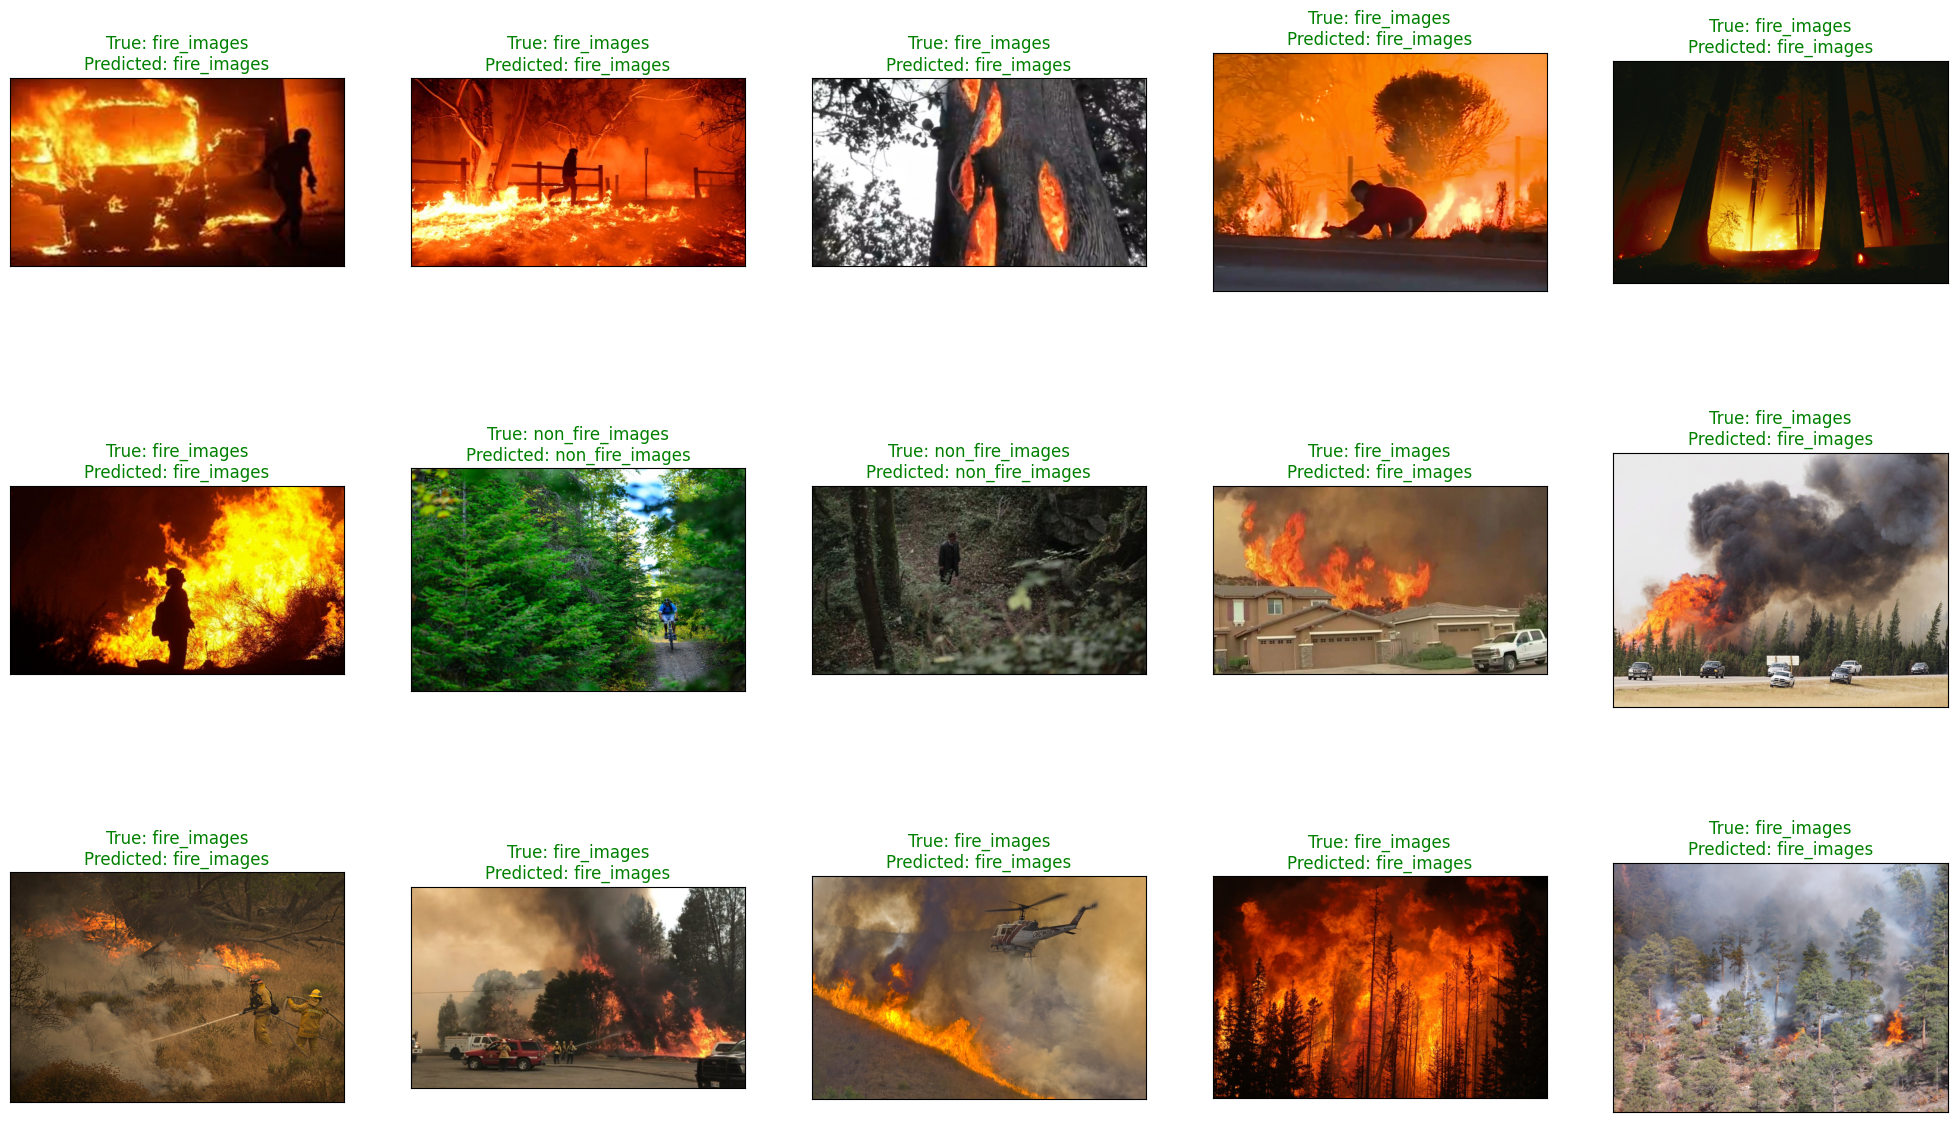

<Figure size 640x480 with 0 Axes>

In [ ]:
 # Display 25 random pictures from the dataset with their labels
random_index = np.random.randint(0, len(test_df) - 1, 15)
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    image = Image.open(test_df.Filepath.iloc[random_index[i]])
    ax.imshow(image)
    if test_df.Label.iloc[random_index[i]] == pred[random_index[i]]:
      color = "green"
    else:
      color = "red"
    ax.set_title(f"True: {test_df.Label.iloc[random_index[i]]}\nPredicted: {pred[random_index[i]]}", color=color)
plt.show()
plt.tight_layout()

In [ ]:
results = model.evaluate(test_images, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.06396
Test Accuracy: 97.50%


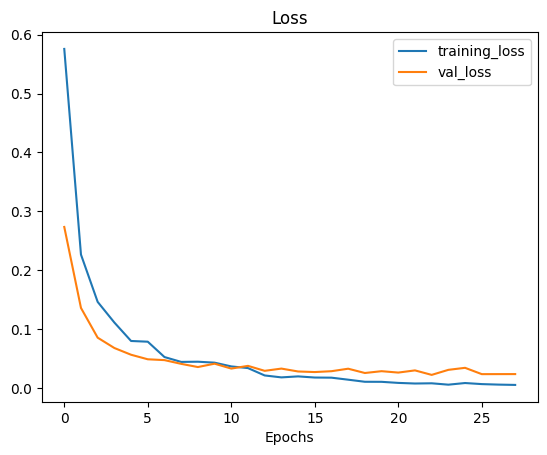

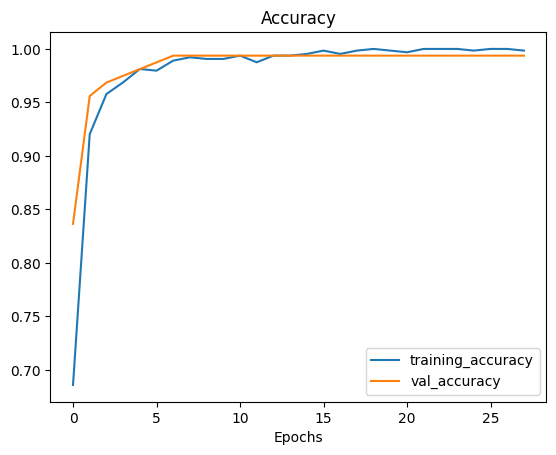

In [ ]:
plot_loss_curves(history)

In [ ]:
y_test = list(test_df.Label)
print(classification_report(y_test, pred))

                 precision    recall  f1-score   support

    fire_images       0.97      1.00      0.98       148
non_fire_images       1.00      0.90      0.95        52

       accuracy                           0.97       200
      macro avg       0.98      0.95      0.97       200
   weighted avg       0.98      0.97      0.97       200



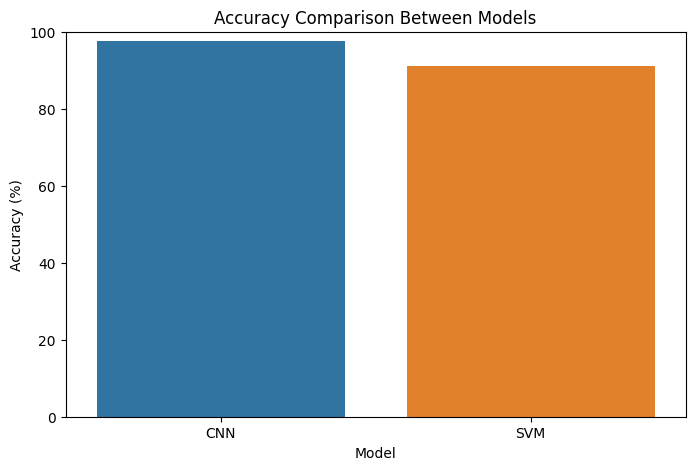

NameError: ignored

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# List of model names
models = ["CNN", "SVM"]

# Accuracy data
accuracy = [97.50, 91.00]

# Create an accuracy comparison plot
plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracy)
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Comparison Between Models")
plt.ylim(0, 100)
plt.show()

# Confusion matrices (for CNN and SVM)
cm_cnn = confusion_matrix(true_labels, cnn_predictions)
cm_svm = confusion_matrix(true_labels, svm_predictions)

# Create confusion matrix heatmaps
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm_cnn, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fire", "Fire"], yticklabels=["Non-Fire", "Fire"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("CNN Confusion Matrix")

plt.subplot(1, 2, 2)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fire", "Fire"], yticklabels=["Non-Fire", "Fire"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("SVM Confusion Matrix")

plt.tight_layout()
plt.show()


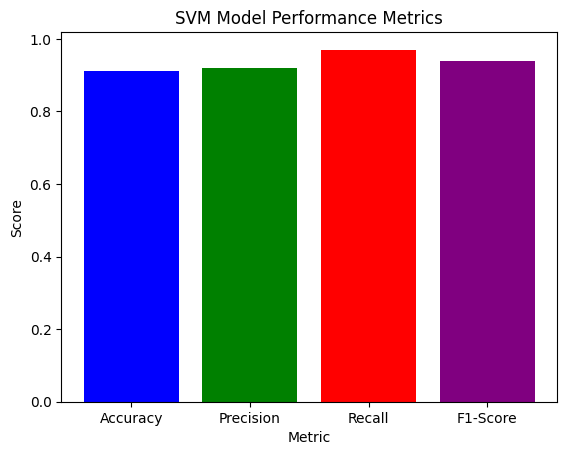

SVM Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.76      0.82        54
           1       0.92      0.97      0.94       146

    accuracy                           0.91       200
   macro avg       0.90      0.86      0.88       200
weighted avg       0.91      0.91      0.91       200



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# SVM results
svm_accuracy = 0.91
svm_precision = 0.92
svm_recall = 0.97
svm_f1_score = 0.94

# Create a bar chart for SVM results
categories = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
svm_metrics = [svm_accuracy, svm_precision, svm_recall, svm_f1_score]

plt.bar(categories, svm_metrics, color=['blue', 'green', 'red', 'purple'])
plt.title('SVM Model Performance Metrics')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.show()

# Display the classification report
print("SVM Classification Report:")
svm_classification_report = """
              precision    recall  f1-score   support

           0       0.89      0.76      0.82        54
           1       0.92      0.97      0.94       146

    accuracy                           0.91       200
   macro avg       0.90      0.86      0.88       200
weighted avg       0.91      0.91      0.91       200
"""

print(svm_classification_report)


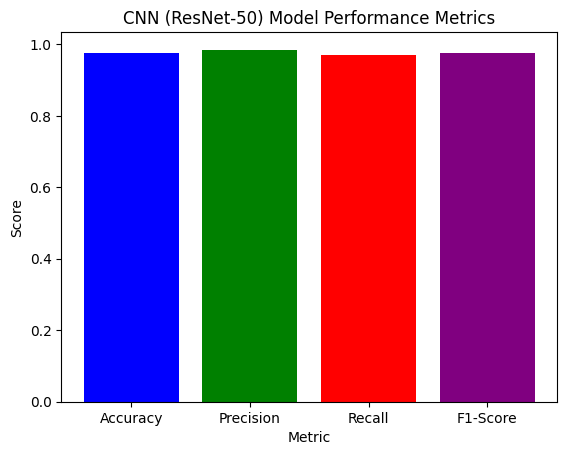

CNN (ResNet-50) Classification Report:

             precision    recall  f1-score   support

fire_images       0.97      1.00      0.98       148
non_fire_images       1.00      0.90      0.95        52

   accuracy                           0.97       200
  macro avg       0.98      0.95      0.97       200
weighted avg       0.98      0.97      0.97       200



In [ ]:
# CNN (ResNet-50) results
cnn_accuracy = 0.975
cnn_precision = 0.985
cnn_recall = 0.97
cnn_f1_score = 0.977

# Create a bar chart for CNN results
cnn_metrics = [cnn_accuracy, cnn_precision, cnn_recall, cnn_f1_score]

plt.bar(categories, cnn_metrics, color=['blue', 'green', 'red', 'purple'])
plt.title('CNN (ResNet-50) Model Performance Metrics')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.show()

# Display the classification report
print("CNN (ResNet-50) Classification Report:")
cnn_classification_report = """
             precision    recall  f1-score   support

fire_images       0.97      1.00      0.98       148
non_fire_images       1.00      0.90      0.95        52

   accuracy                           0.97       200
  macro avg       0.98      0.95      0.97       200
weighted avg       0.98      0.97      0.97       200
"""

print(cnn_classification_report)


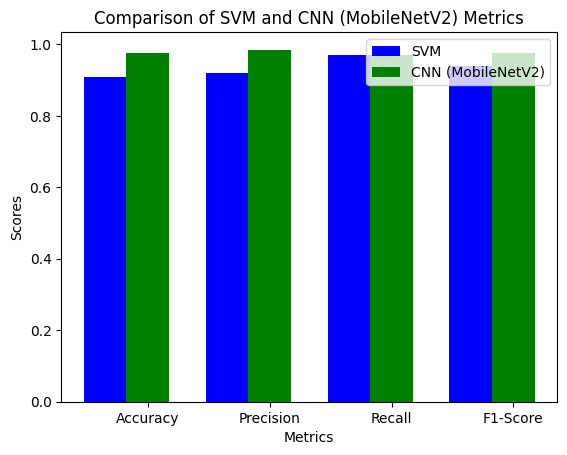

SVM Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.76      0.82        54
           1       0.92      0.97      0.94       146

    accuracy                           0.91       200
   macro avg       0.90      0.86      0.88       200
weighted avg       0.91      0.91      0.91       200

CNN (MobileNetV2) Classification Report:

             precision    recall  f1-score   support

fire_images       0.97      1.00      0.98       148
non_fire_images       1.00      0.90      0.95        52

   accuracy                           0.97       200
  macro avg       0.98      0.95      0.97       200
weighted avg       0.98      0.97      0.97       200



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# SVM results
svm_accuracy = 0.91
svm_precision = 0.92
svm_recall = 0.97
svm_f1_score = 0.94

# CNN (ResNet-50) results
cnn_accuracy = 0.975
cnn_precision = 0.985
cnn_recall = 0.97
cnn_f1_score = 0.977

# Create bar charts for accuracy, precision, recall, and F1-score
categories = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
svm_metrics = [svm_accuracy, svm_precision, svm_recall, svm_f1_score]
cnn_metrics = [cnn_accuracy, cnn_precision, cnn_recall, cnn_f1_score]

x = range(len(categories))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x, svm_metrics, width, label='SVM', color='b')
rects2 = ax.bar([i + width for i in x], cnn_metrics, width, label='CNN (MobileNetV2)', color='g')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of SVM and CNN (MobileNetV2) Metrics')
ax.set_xticks([i + width for i in x])
ax.set_xticklabels(categories)
ax.legend()

plt.show()

# Display the classification reports for both models
print("SVM Classification Report:")
svm_classification_report = """
              precision    recall  f1-score   support

           0       0.89      0.76      0.82        54
           1       0.92      0.97      0.94       146

    accuracy                           0.91       200
   macro avg       0.90      0.86      0.88       200
weighted avg       0.91      0.91      0.91       200
"""

print(svm_classification_report)

print("CNN (MobileNetV2) Classification Report:")
cnn_classification_report = """
             precision    recall  f1-score   support

fire_images       0.97      1.00      0.98       148
non_fire_images       1.00      0.90      0.95        52

   accuracy                           0.97       200
  macro avg       0.98      0.95      0.97       200
weighted avg       0.98      0.97      0.97       200
"""

print(cnn_classification_report)
